# Watts-Strogatz direct graph on the 2-dimensional space

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
from dgraph import readGraph
from dgraph import standardize
from dgraph import Page_Rank as pr
from dgraph import fill_incoming as fi
from dgraph import Independent_Cascade as ic
from dgraph import GenWSGridGraph as genWS
from dgraph import WS2DGraph as WS2D
from lesson4 import topk
from lesson5 import eigenvector_centrality as ec
from lesson4 import betweenness
from lesson1 import averageClustering as ac
from lesson2 import countEdges
from dgraph import toUndirect as und

In [2]:
def independent_cascade(graph, seed, centrality):
    adopters, haters, steps = ic(g, seed)
    print 'Independent Cascade Model: TOP %d %s' % (len(seed), centrality)
    print '\tFinal Adopters:\t', len(adopters)
    print '\tFinal Haters:\t', len(haters)
    print '\t# Iterations:\t', steps
    return len(adopters)

## Set Parameters

In [3]:
NODES = 7115
edges = random.randint(75000, 125000)
radius = 2
weak_ties = [i*5 for i in xrange(0, 3)]
seed = 100

##Create a Watts-Strogatz 2D direct graph

In [4]:
g = standardize(WS2D(NODES, edges, radius, weak_ties))
print 'Edges %d\tAverage Clustering = %f' % (countEdges(g)*2,ac(und(g)))

Edges 123020	Average Clustering = 0.201524


In [5]:
fi(g) # Fill incoming edges

## Execute centrality measures

In [6]:
print 'Page Rank execution...'
pagerank, iterations, err = pr(g, alpha=1.0e-5, eps=1.0e-3)
print iterations, ' iterations. Error:', err
top_pr = [a for a,b in topk(pagerank, seed)]

Page Rank execution...
28  iterations. Error: 0.000732137760615


In [7]:
print 'Eigenvector Centrality...',
cscores, diffsum = ec(g)
top_eigenc = [a for a, b in topk(cscores, seed)]
print 'Done'

Eigenvector Centrality... Done


In [8]:
print 'Betweennes centrality...',
bet = betweenness(g)
top_bet = [a for a, b in topk(bet, seed)]
print 'Done'

Betweennes centrality... Done


## Execute Independent Cascade Model

In [9]:
seed = 100
max_pr_ad = independent_cascade(g, top_pr[:seed], 'Page Rank')
max_eigenc_ad = independent_cascade(g, top_eigenc[:seed], 'Eigenvector')
max_bet_ad = independent_cascade(g, top_bet[:seed], 'Betweenness')

Independent Cascade Model: TOP 100 Page Rank
	Final Adopters:	271
	Final Haters:	6844
	# Iterations:	12
Independent Cascade Model: TOP 100 Eigenvector
	Final Adopters:	188
	Final Haters:	6927
	# Iterations:	6
Independent Cascade Model: TOP 100 Betweenness
	Final Adopters:	203
	Final Haters:	6912
	# Iterations:	8


In [10]:
while seed > 0:
    seed -= 5
    adopters_pr = independent_cascade(g, top_pr[:seed], 'Page Rank')
    if max_pr_ad <= adopters_pr:
        max_pr_ad = adopters_pr
    else:
        break
        

Independent Cascade Model: TOP 95 Page Rank
	Final Adopters:	211
	Final Haters:	6904
	# Iterations:	6


In [11]:
seed = 100
while seed > 0:
    seed -= 5
    adopters_eigenc = independent_cascade(g, top_eigenc[:seed], 'Eigenvector')
    if max_eigenc_ad <= adopters_eigenc:
        max_eigenc_ad = adopters_eigenc
    else:
        break
         

Independent Cascade Model: TOP 95 Eigenvector
	Final Adopters:	224
	Final Haters:	6891
	# Iterations:	8
Independent Cascade Model: TOP 90 Eigenvector
	Final Adopters:	180
	Final Haters:	6935
	# Iterations:	6


In [12]:
   
seed = 100
while seed > 0:
    seed -= 5
    adopters_bet = independent_cascade(g, top_bet[:seed], 'Betweenness')
    if max_bet_ad <= adopters_bet:
        max_bet_ad = adopters_bet
    else:       
        break
    

Independent Cascade Model: TOP 95 Betweenness
	Final Adopters:	230
	Final Haters:	6885
	# Iterations:	7
Independent Cascade Model: TOP 90 Betweenness
	Final Adopters:	194
	Final Haters:	6921
	# Iterations:	8


## Final adopters graphical comparison

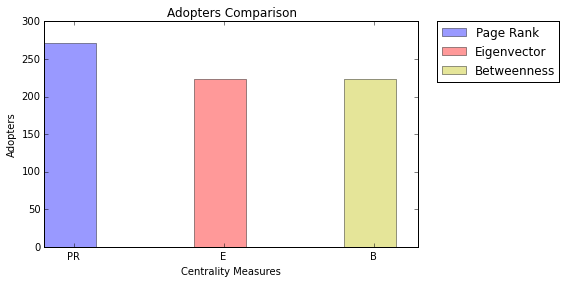

In [13]:
max_adopters = (max_pr_ad, max_eigenc_ad, max_bet_ad)

fig, ax = plt.subplots()

bar_width = 0.35

opacity = 0.4

rects1 = plt.bar(1, max_pr_ad, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Page Rank')

rects2 = plt.bar(2, max_eigenc_ad, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Eigenvector')

rects3 = plt.bar(3, max_eigenc_ad, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Betweenness')

plt.xlabel('Centrality Measures')
plt.ylabel('Adopters')
plt.title('Adopters Comparison')
plt.xticks([1.2,2.2,3.2], ('PR', 'E', 'B'))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()